# The Scikit-Learn California Housing Dataset

We are going to use the California housing dataset to illustrate how the KNN algorithm works. The dataset was derived from the 1990 U.S. census. One row of the dataset represents the census of one block group.

### The dataset consists of nine attributes:

- MedInc - median income in block group
- HouseAge - median house age in a block group
- AveRooms - the average number of rooms (provided per household)
- AveBedrms - the average number of bedrooms (provided per household)
- Population - block group population
- AveOccup - the average number of household members
- Latitude - block group latitude
- Longitude - block group longitude
- MedHouseVal - median house value for California districts (hundreds of thousands of dollars)

### The dataset is already part of the Scikit-Learn library, we only need to import it and load it as a dataframe:

In [5]:
from sklearn.datasets import fetch_california_housing
# as_frame=True loads the data in a dataframe format, with other metadata besides it
california_housing = fetch_california_housing(as_frame=True)
# Select only the dataframe part and assign it to the df variable
df = california_housing.frame

## Regression with K-Nearest Neighbors with Scikit-Learn

So far, we got to know our dataset and now can proceed to other steps in the KNN algorithm.

## Preprocessing Data for KNN Regression

In [6]:
y = df['MedHouseVal']
X = df.drop(['MedHouseVal'], axis = 1)

By looking at our variables descriptions, we can see that we have differences in measurements. To avoid guessing, let's use the describe() method to check:

In [7]:
# .T transposes the results, transforming rows into columns
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


Here, we can see that the mean value of MedInc is approximately 3.87 and the mean value of HouseAge is about 28.64, making it 7.4 times larger than MedInc. Other features also have differences in mean and standard deviation - to see that, look at the mean and std values and observe how they are distant from each other. For MedInc std is approximately 1.9, for HouseAge, std is 12.59 and the same applies to the other features.

We're using an algorithm based on distance and distance-based algorithms suffer greatly from data that isn't on the same scale, such as this data. The scale of the points may (and in practice, almost always does) distort the real distance between values.

To perform Feature Scaling, we will use Scikit-Learn's StandardScaler class later. If we apply the scaling right now (before a train-test split), the calculation would include test data, effectively leaking test data information into the rest of the pipeline. This sort of data leakage is unfortunately commonly skipped, resulting in irreproducible or illusory findings.

## Splitting Data into Train and Test Sets

In [8]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

We can inspect those numbers quickly by printing the lengths of the full dataset and of split data:

In [9]:
print(len(X))       # 20640
print(len(X_train)) # 15480
print(len(X_test))  # 5160

20640
15480
5160


In [10]:
import numpy as np
np.sqrt(len(X_train))

124.41864811996632

## Feature Scaling for KNN Regression

By importing StandardScaler, instantiating it, fitting it according to our train data (preventing leakage), and transforming both train and test datasets, we can perform feature scaling:

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)

Now our data is scaled! The scaler maintains only the data points, and not the column names, when applied on a DataFrame. Let's organize the data into a DataFrame again with column names and use describe() to observe the changes in mean and std:

In [8]:
import pandas as pd
col_names=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
scaled_df = pd.DataFrame(X_train, columns=col_names)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,15480.0,2.172968e-16,1.000032,-1.774632,-0.688854,-0.175663,0.464450,5.842113
HouseAge,15480.0,-1.254954e-16,1.000032,-2.188261,-0.840224,0.032036,0.666407,1.855852
AveRooms,15480.0,-1.148163e-16,1.000032,-1.877586,-0.407008,-0.083940,0.257082,56.357392
AveBedrms,15480.0,1.239408e-16,1.000032,-1.740123,-0.205765,-0.108332,0.007435,55.925392
Population,15480.0,-7.874838e-17,1.000032,-1.246395,-0.558886,-0.227928,0.262056,29.971725
AveOccup,15480.0,2.672550e-17,1.000032,-0.201946,-0.056581,-0.024172,0.014501,103.737365
Latitude,15480.0,8.022581e-16,1.000032,-1.451215,-0.799820,-0.645172,0.971601,2.953905
Longitude,15480.0,2.169625e-15,1.000032,-2.380303,-1.106817,0.536231,0.785934,2.633738


In [9]:
## Building the model

from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model

KNeighborsRegressor()

## Training and Predicting KNN Regression

In [10]:
model.fit(X_train, y_train)

KNeighborsRegressor()

## Predciting Values

In [11]:
y_pred = model.predict(X_test)
y_pred[:5]

array([0.5172  , 0.7646  , 5.000008, 2.8078  , 2.939   ])

## Evaluating the Algorithm for KNN Regression

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.4287019976744185
mse: 0.39968317568845113
rmse: 0.6322050108061871


## The R2 can be calculated directly with the score() method:

In [13]:
model.score(X_test, y_test)

0.6979461101654933

The results show that our KNN algorithm overall error and mean error are around 0.44, and 0.43. Also, the RMSE shows that we can go above or below the actual value of data by adding 0.65 or subtracting 0.65. How good is that?

Let's check what the prices look like

In [15]:
## Building the model again with k=2

from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=2)
model

KNeighborsRegressor(n_neighbors=2)

In [16]:
y_pred = model.predict(X_test)
y_pred

NotFittedError: This KNeighborsRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

The mean is 2.06 and the standard deviation from the mean is 1.15 so our score of ~0.44 isn't really stellar, but isn't too bad.

With the R2, the closest to 1 we get (or 100), the better. The R2 tells how much of the changes in data, or data variance are being understood or explained by KNN.

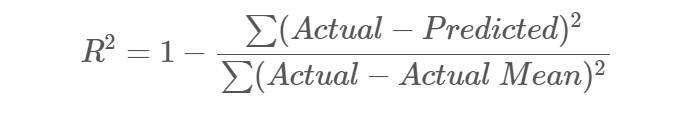

With a value of 0.67, we can see that our model explains 67% of the data variance. It is already more than 50%, which is ok, but not very good. Is there any way we could do better?

We have used a predetermined K with a value of 5, so, we are using 5 neighbors to predict our targets which is not necessarily the best number. To understand which would be an ideal number of Ks, we can analyze our algorithm errors and choose the K that minimizes the loss.

## Finding the Best K for KNN Regression

Ideally, you would see which metric fits more into your context - but it is usually interesting to test all metrics. Whenever you can test all of them, do it. Here, we will show how to choose the best K using only the mean absolute error, but you can change it to any other metric and compare the results.

To do this, we will create a for loop and run models that have from 1 to X neighbors. At each interaction, we will calculate the MAE and plot the number of Ks along with the MAE result:

In [20]:
from sklearn.metrics import mean_absolute_error
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 41):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)
    
print(len(error))

40


## Now, let's plot the errors:

Text(0, 0.5, 'Mean Absolute Error')

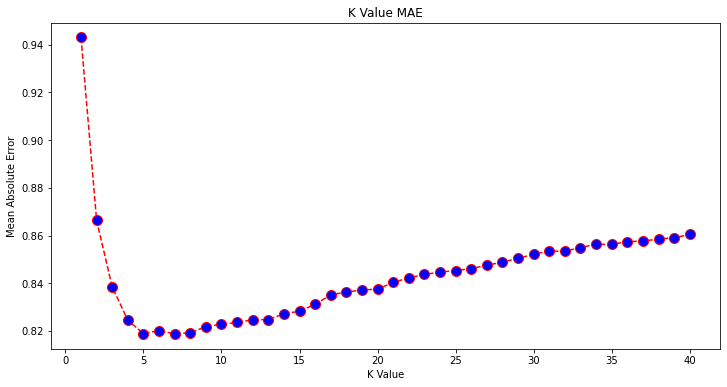

In [23]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

Looking at the plot, it seems the lowest MAE value is when K is 12. Let's get a closer look at the plot to be sure by plotting less data:

Text(0, 0.5, 'Mean Absolute Error')

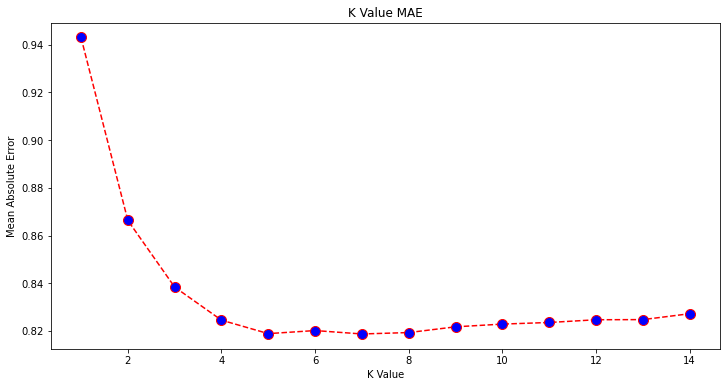

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error[:14], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

You can also obtain the lowest error and the index of that point using the built-in min() function (works on lists) or convert the list into a NumPy array and get the argmin() (index of the element with the lowest value):

In [25]:
import numpy as np 

print(min(error))               # 0.43631325936692505
print(np.array(error).argmin()) # 11

0.818708092192691
6


We started counting neighbors on 1, while arrays are 0-based, so the 11th index is 12 neighbors!

This means that we need 12 neighbors to be able to predict a point with the lowest MAE error. We can execute the model and metrics again with 12 neighbors to compare results:

In [26]:
knn_reg12 = KNeighborsRegressor(n_neighbors=12)
knn_reg12.fit(X_train, y_train)
y_pred12 = knn_reg12.predict(X_test)
r2 = knn_reg12.score(X_test, y_test) 

mae12 = mean_absolute_error(y_test, y_pred12)
mse12 = mean_squared_error(y_test, y_pred12)
rmse12 = mean_squared_error(y_test, y_pred12, squared=False)
print(f'r2: {r2}, \nmae: {mae12} \nmse: {mse12} \nrmse: {rmse12}')

NameError: name 'mean_squared_error' is not defined

# Classification using K-Nearest Neighbors with Scikit-Learn

## Preprocessing Data for Classification

Let's create the data bins to transform our continuous values into categories:

In [20]:
# Creating 4 categories and assigning them to a MedHouseValCat column
df["MedHouseValCat"] = pd.qcut(df["MedHouseVal"], 4, retbins=False, labels=[1, 2, 3, 4])

## Then, we can split our dataset into its attributes and labels:

In [21]:
y = df['MedHouseValCat']
X = df.drop(['MedHouseVal', 'MedHouseValCat'], axis = 1)

## Splitting Data into Train and Test Sets

In [22]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

## Feature Scaling for Classification

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Training and Predicting for Classification

In [24]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

After fitting the KNeighborsClassifier, we can predict the classes of the test data:

In [25]:
y_pred = classifier.predict(X_test)

## Evaluating KNN for Classification

### Let's score our classifier:

In [26]:
acc =  classifier.score(X_test, y_test)
print(acc) # 0.6191860465116279

0.6191860465116279


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [ ]:
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

## Pros and Cons of KNN

# Pros

- It is easy to implement
- It is a lazy learning algorithm and therefore doesn't require training on all data points (only using the K-Nearest neighbors to predict). This makes the KNN algorithm much faster than other algorithms that require training with the whole dataset such as Support Vector Machines, linear regression, etc.
- Since KNN requires no training before making predictions, new data can be added seamlessly
- There are only two parameters required to work with KNN, i.e. the value of K and the distance function

# Cons

- The KNN algorithm doesn't work well with high dimensional data because with a large number of dimensions, the distance between points gets "weird", and the distance metrics we use don't hold up
- Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features